# Pegando DRE do repositório da CVM

Primeiramente devemos acessar o repositório da CVM:

http://dados.cvm.gov.br/dados/

Outra maneira de ser acessar estes dados é no rad.cvm.gov.br. Este sistema é capaz de buscar as informações e apresentá-las de maneira organizada. Porém ele não é muito simples para se fazer um webscrapping. Por isso optamos por importar os dados via CSV.

https://www.rad.cvm.gov.br/ENET/frmConsultaExternaCVM.aspx
        

## Vamos lá!

O primeiro passo é fazer o download dos ZIPs que contêm as DRE no formato CSV.

In [ ]:
import requests
import zipfile

def download():
    cvmzip_list = [
        'dfp_cia_aberta_%d.zip' % y for y in range(2010, 2024)
    ]

    base_url = 'https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/'

    for cvmzip in cvmzip_list:
        print('Arquivio:', cvmzip)
        response = requests.get(base_url + cvmzip)
        with open(cvmzip, 'wb') as fp:
            print('Download...')
            fp.write(response.content)

        with zipfile.ZipFile(cvmzip, 'r') as zip_ref:
            print('Unzip...')
            zip_ref.extractall()

download()

Arquivio: dfp_cia_aberta_2010.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2011.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2012.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2013.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2014.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2015.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2016.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2017.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2018.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2019.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2020.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2021.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2022.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2023.zip
Download...
Unzip...


## Carregar os dados

Agora devemos carregar os dados. Podemos fazer de muitas formas, inclusive podemos usar o Pandas

Porém, eu procurei usar o Python 'vanilla'.
##### Atenção: Cuidado com o encoding dos arquivos.

In [ ]:
import csv
from collections import defaultdict
from dateutil import parser as du_parser


def carrega_dados():

    # Estrutura para carregar os dados
    # Empresa -> Categoria -> Ano do Exercício
    dados = defaultdict(lambda: defaultdict(dict))

    cvm_csv_list = [
        'dfp_cia_aberta_DRE_con_%d.csv' % y for y in range(2010, 2024)
    ]

    for cvm_csv in cvm_csv_list:

        print('Processando:', cvm_csv)
        with open(cvm_csv, encoding='iso-8859-1') as fp:

            next(fp) # Pula o header
            csv_reader = csv.reader(fp, delimiter=';')

            for row in csv_reader:
                empresa = row[3]
                ref = (du_parser.parse(row[9]), du_parser.parse(row[10]))
                categoria = (row[11], row[12])
                valor = float(row[13])

                dados[empresa][categoria][ref] = valor

    return dados

dados = carrega_dados()

Processando: dfp_cia_aberta_DRE_con_2010.csv
Processando: dfp_cia_aberta_DRE_con_2011.csv
Processando: dfp_cia_aberta_DRE_con_2012.csv
Processando: dfp_cia_aberta_DRE_con_2013.csv
Processando: dfp_cia_aberta_DRE_con_2014.csv
Processando: dfp_cia_aberta_DRE_con_2015.csv
Processando: dfp_cia_aberta_DRE_con_2016.csv
Processando: dfp_cia_aberta_DRE_con_2017.csv
Processando: dfp_cia_aberta_DRE_con_2018.csv
Processando: dfp_cia_aberta_DRE_con_2019.csv
Processando: dfp_cia_aberta_DRE_con_2020.csv
Processando: dfp_cia_aberta_DRE_con_2021.csv
Processando: dfp_cia_aberta_DRE_con_2022.csv
Processando: dfp_cia_aberta_DRE_con_2023.csv


In [ ]:
print(list(dados.keys()))

['BCO BRASIL S.A.', 'BRB BANCO DE BRASILIA S.A.', 'CENTRAIS ELET BRAS S.A. - ELETROBRAS', 'COMPANHIA ENERGÉTICA DE BRASÍLIA - CEB', 'VBC ENERGIA SA', 'NET SERVIÇOS DE COMUNICAÇÃO S.A.', 'FORPART S.A. - EM LIQUIDAÇÃO', 'KOSMOS COMÉRCIO DE VESTUÁRIO S/A - EM RECUPERAÇÃO JUDICIAL', 'STATKRAFT ENERGIAS RENOVAVEIS S.A.', 'LITEL PARTICIPACOES S.A.', 'AMERICANAS S.A. - EM RECUPERAÇÃO JUDICIAL', 'ENERGISA S.A.', 'FERROVIA CENTRO-ATLANTICA S.A.', 'COMERCIAL QUINTELLA COM EXP SA EM LIQUIDAÇÃO', 'CIELO S.A. -  INSTITUIÇÃO DE PAGAMENTO', 'NEOENERGIA S.A.', 'UNIVERSO ONLINE SA', 'VOTORANTIM FINANÇAS SA', 'GAFISA S.A.', '521 PARTICIPACOES S.A. - EM LIQUIDAÇÃO EXTRAJUDICIAL', 'BELAPART SA', 'VALETRON SA', 'TAM S.A.', 'BRF S.A.', 'AES ELPA S.A.', 'CIA PARTICIPACOES ALIANCA DA BAHIA', 'SUL 116 PARTICIPACOES S.A.', 'EMPRESA NAC COM REDITO PART S.A.ENCORPAR', 'VIRGO II COMPANHIA DE SECURITIZACAO', 'TELEMAR PARTICIPAÇÕES SA', 'PORTO SEGURO S.A.', 'UPTICK PARTICIPACOES S.A.', 'EDITORA ABRIL S/A', 'DEXXOS P

# Visualizar

Para concluir nosso exemplo, vamos criar um gráfico que mistura informação de balanço (provenientes da CVM)
e informações sobre cotações (provenientes da Yahoo, no caso.)

Neste exemplo vamos usar a empresa WEG:
https://ri.weg.net/

#### Atenção: Nem a CVM nem a yfinance usam o código de negociação das B3.

[*********************100%%**********************]  1 of 1 completed


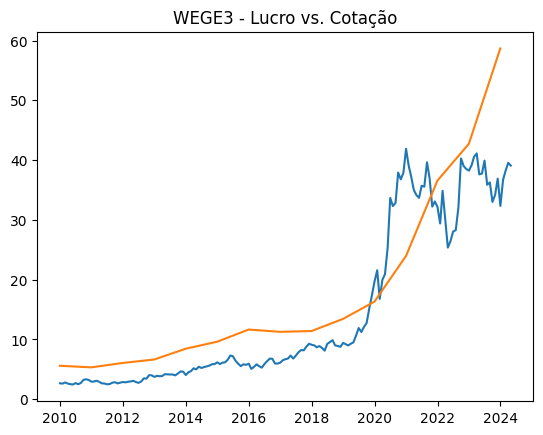

In [ ]:
%matplotlib inline

import yfinance as yf
import matplotlib.pyplot as pyplot

def pega_cotacoes(tickers):
    return  yf.download(
            tickers = tickers,
            start="2010-01-01", end="2024-5-30",
            interval = "1mo",
            group_by = 'ticker',
    )


cotacoes = pega_cotacoes('WEGE3.SA')

# trata o formato
q = cotacoes['Close'].dropna()
b = {
        k[1]: v / 100000 #data final do periodo e manter a escala
        for k, v in
        dados['WEG S.A.'][('3.11', 'Lucro/Prejuízo Consolidado do Período')].items()
    }

pyplot.plot(q)
pyplot.plot(list(b.keys()), list(b.values()))
pyplot.title('WEGE3 - Lucro vs. Cotação')
pyplot.show()